In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

## <center>Week 1 - Homework</center>

### Q1. Downloading the data

<hr>

We'll use the same [NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [2]:
df = pd.read_parquet('data/homework/yellow_tripdata_2023-01.parquet')

len(df.columns)

19

### Q2. Computing duration
<hr>

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [3]:
# Convert from string to date time format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create a new column called duration (in minutes)
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])
df['duration'] = df['duration'].dt.total_seconds() / 60

df['duration'].std()

42.594351241920904

### Q3. Dropping outliers
<hr>

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

In [4]:
len_before_drop  = len(df)

df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

len_after_drop  = len(df)

(len_after_drop / len_before_drop) * 100

98.1220282212598

### Q4. One-hot encoding

<hr>

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

+ Turn the dataframe into a list of dictionaries
+ Fit a dictionary vectorizer
+ Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [5]:
cat_cols = ['PULocationID', 'DOLocationID']

df2 = df[cat_cols].astype('object')

In [6]:
df2

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


In [7]:
df2 = df2.to_dict(orient='records')

dv = DictVectorizer()
X = dv.fit_transform(df2)

In [8]:
X.shape[1]

2

### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

+ Train a plain linear regression model with default parameters
+ Calculate the Rrmse of the model on the training data

What's the Rrmse on train?

+ 6.99
+ 11.99
+ 16.99
+ 21.99


In [9]:
y = df['duration'].values

In [10]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [11]:
y_pred = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression - rmse: 9.835277713631873')

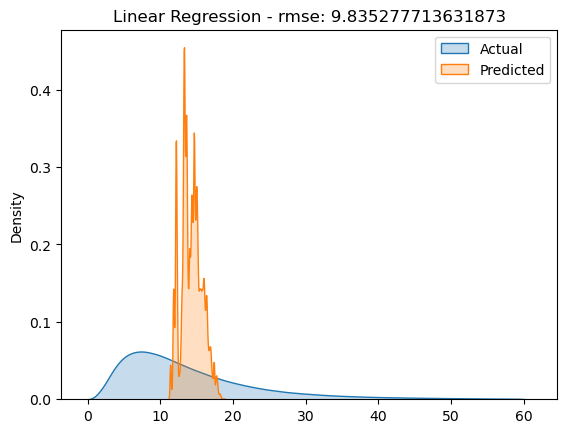

In [12]:
sns.kdeplot(y, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)

plt.legend()

rmse = mean_squared_error(y, y_pred, squared=False)
plt.title("Linear Regression - rmse: " + str(rmse))

## Validation Dataset

In [13]:
val_data = pd.read_parquet('data/homework/yellow_tripdata_2023-02.parquet')

In [14]:
# Convert from string to date time format
val_data['tpep_pickup_datetime'] = pd.to_datetime(val_data['tpep_pickup_datetime'])
val_data['tpep_dropoff_datetime'] = pd.to_datetime(val_data['tpep_dropoff_datetime'])

# Create a new column called duration (in minutes)
val_data['duration'] = (val_data['tpep_dropoff_datetime'] - val_data['tpep_pickup_datetime'])
val_data['duration'] = val_data['duration'].dt.total_seconds() / 60

In [15]:
val_data = val_data[(val_data['duration'] >= 1) & (val_data['duration'] <= 60)]

In [16]:
cat_cols = ['PULocationID', 'DOLocationID']

df_val = val_data[cat_cols].astype('object')

df_val = df_val.to_dict(orient='records')

X_test = dv.transform(df_val)

In [17]:
y_test = val_data['duration']

In [18]:
y_val_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Linear Regression - rmse: 9.963607595829973')

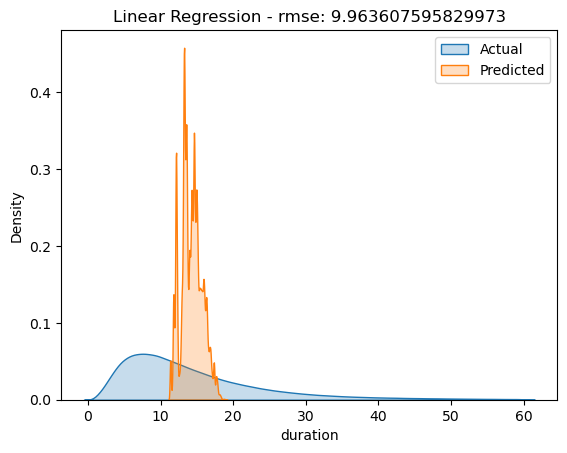

In [19]:
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_val_pred, label='Predicted', fill=True)

plt.legend()

rmse = mean_squared_error(y_test, y_val_pred, squared=False)
plt.title("Linear Regression - rmse: " + str(rmse))

## Final Words

It seems that our model currently is not performing well, since distribution of predicted values is vastly different. From rmse alone, we can say that our model is off by almost 10 minutes